# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


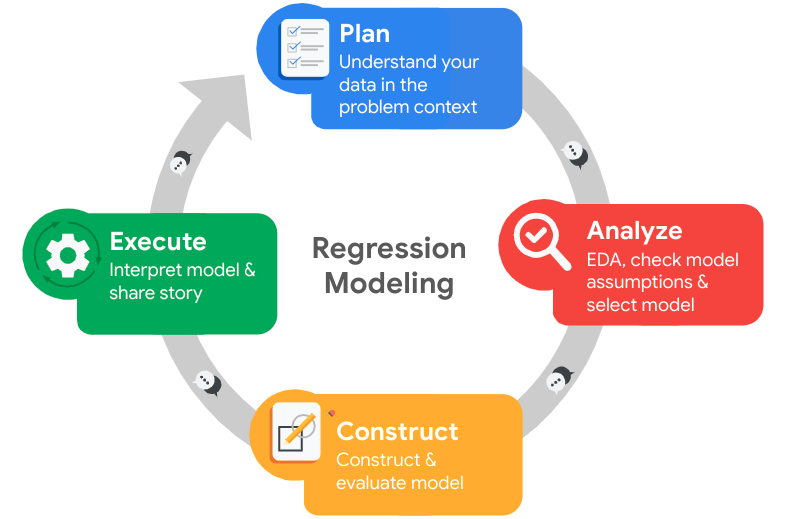

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don‚Äôt know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what‚Äôs likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

üí≠
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




The stakeholders are the company that i'm working for, in this case, Salifort Motors. 

We're trying to figure out how to increase tenure and see what correlates the most to it, that means that's our most important value is time_spend_company, which should be marked as tenure.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [56]:
# Import packages
### YOUR CODE HERE ### 

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [57]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(5)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [58]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [59]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [60]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [61]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns = {'Work_accident':'work_accident',
                           'Department': 'department',
                            'time_spend_company':'tenure',
                            'average_montly_hours' : 'average_monthly_hours',
                           })

# Display all column names after the update
### YOUR CODE HERE ###

In [62]:

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [63]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()
#no missing values surprisngly

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [64]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()
#a lot of duplicates

3008

In [65]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_monthly_hours  tenure  work_accident  left  \
396                     139       3              0     1   
866                     128       3              0     1   
1317                    127       3              0     1   
1368                    132       3              0     1   
1461                    142       3              0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

In [66]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df=df0.drop_duplicates(keep = 'first')
# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df.head(5)

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

### Check outliers

Check for outliers in the data.

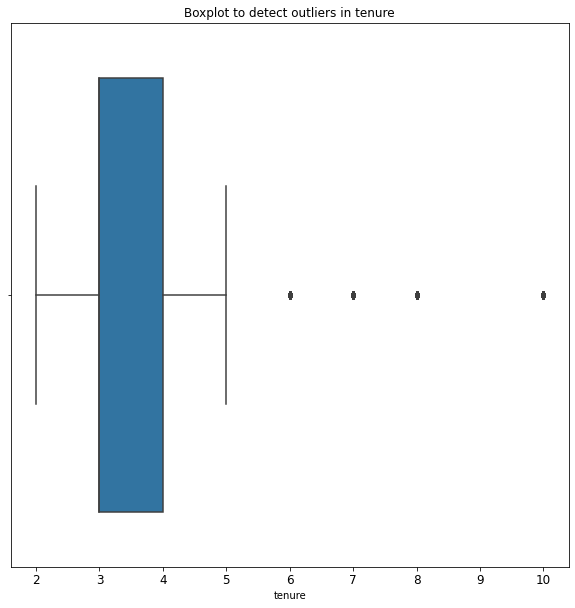

In [67]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(10,10))
plt.title('Boxplot to detect outliers in tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Tenure')
sns.boxplot(x=df['tenure'])
plt.show()


In [68]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

#the best way to detect outliers is through using percentiles and iqr
p1 = df['tenure'].quantile(0.25) #25th quantile
p3 = df['tenure'].quantile(0.75) #75th quantile

iqr = p3 - p1

upper_limit = p3 + 1.5*iqr
lower_limit = p1 - 1.5*iqr
print(upper_limit, lower_limit)

#now that we have the quanitles, we need to find the upper and lower limits
outliers = df[(df['tenure'] > upper_limit) | (df['tenure'] < lower_limit)]
outliers

5.5 1.5


satisfaction_level  last_evaluation  number_project  \
1                    0.80             0.86               5   
17                   0.78             0.99               4   
34                   0.84             0.87               4   
47                   0.57             0.70               3   
67                   0.90             0.98               4   
...                   ...              ...             ...   
11994                0.22             0.94               3   
11995                0.90             0.55               3   
11996                0.74             0.95               5   
11997                0.85             0.54               3   
11998                0.33             0.65               3   

       average_monthly_hours  tenure  work_accident  left  \
1                        262       6              0     1   
17                       255       6              0     1   
34                       246       6              0     1   
47                       273       6              0     1   
67                       264       6              0     1   
...                      ...     ...            ...   ...   
11994                    193      10              0     0   
11995                    259      10              1     0   
11996                    266      10              0     0   
11997                    185      10              0     0   
11998                    172      10              0     0   

       promotion_last_5years   department  salary  
1                          0        sales  medium  
17                         0        sales     low  
34                         0           hr     low  
47                         0      support     low  
67                         0  product_mng  medium  
...                      ...          ...     ...  
11994                      1   management    high  
11995                      1   management    high  
11996                      1   management    high  
11997                      1   management    high  
11998                      1    marketing    high  

[824 rows x 10 columns]

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



üí≠
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [69]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
# df.columns
# df['left'].value_counts()
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
df['left'].value_counts(normalize = True)

0    0.833959
1    0.166041
Name: left, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [70]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

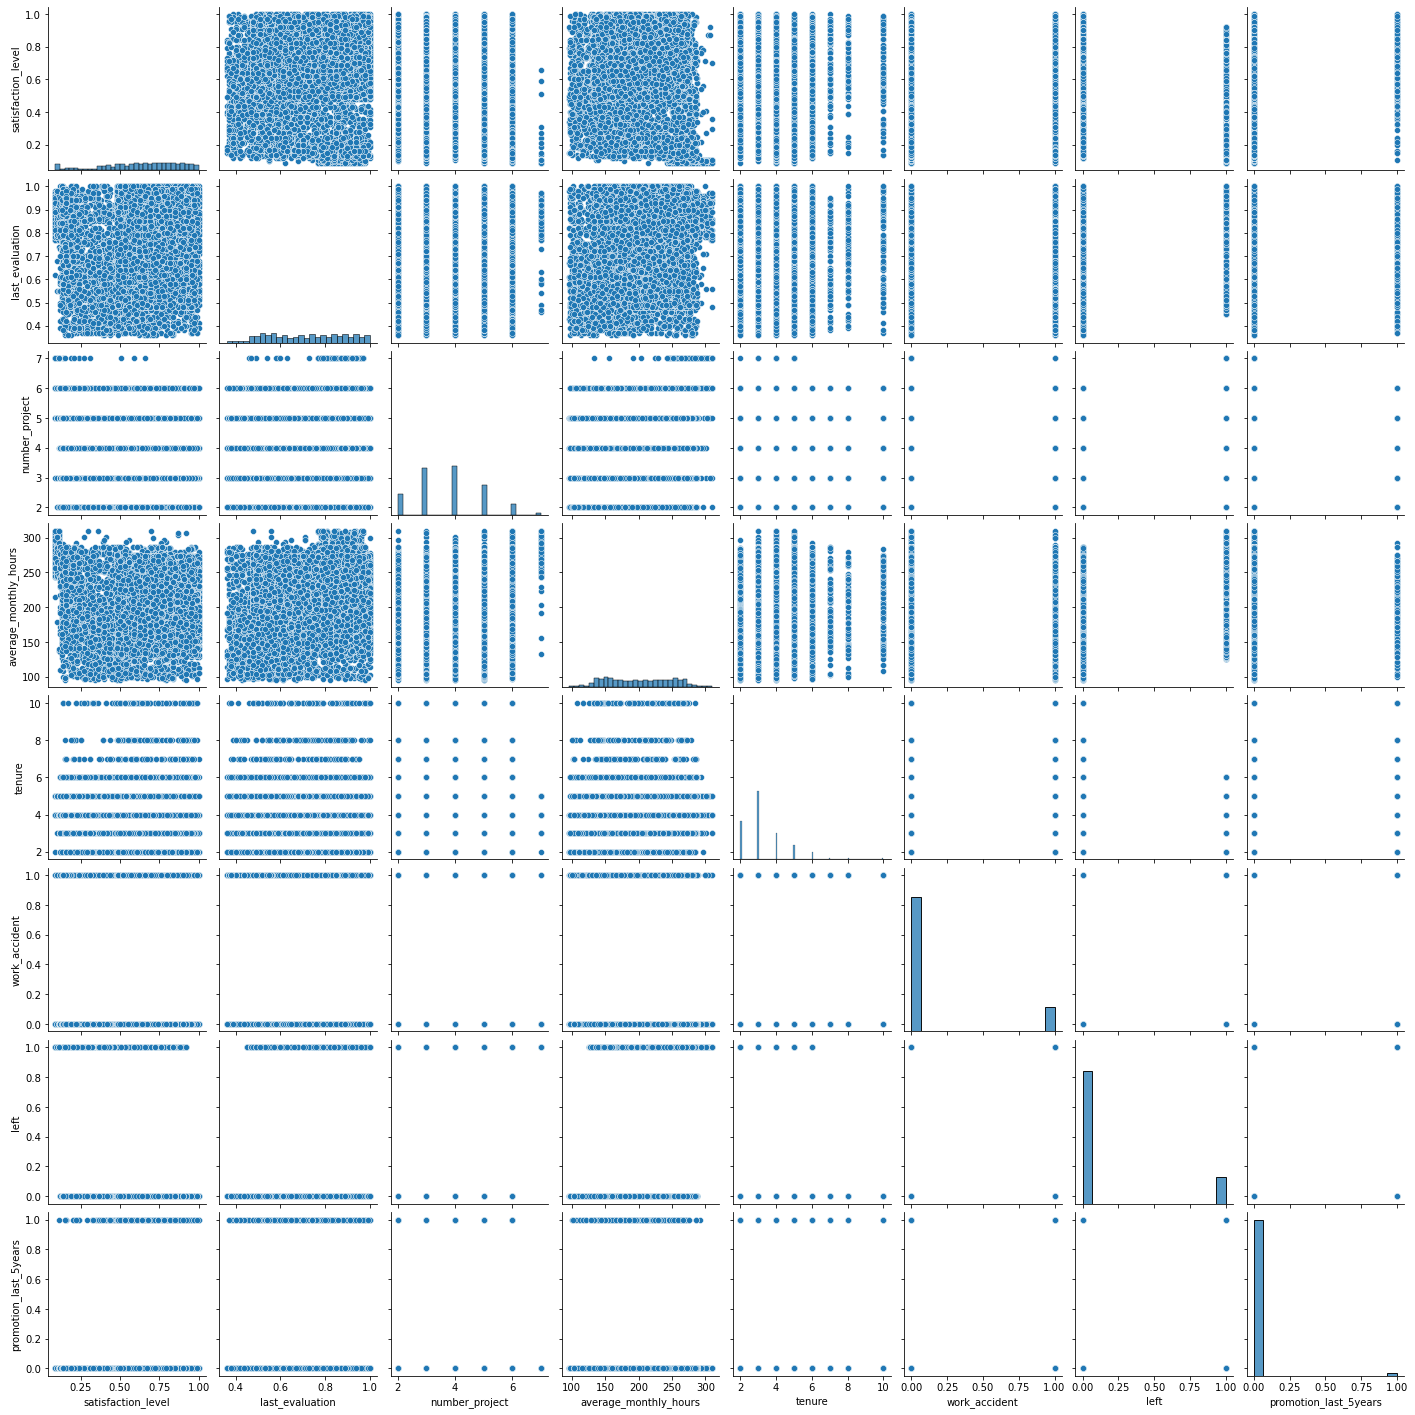

In [87]:
# Create a plot as needed
### YOUR CODE HERE ###
#the first thing to do is generally to make a pairplot, since it shows at least loose correlation between every 
sns.pairplot(df)

While we are doing a pairplot to look at variable correlations, we ar emost interested in things that can allocate with left and tenure in some way. Immediately, when looking at number of projects, there is clearly one entire value that is missing for those who did not leave, meaning there is definitely some sort of loose correlation at minimum with left and number_project. Left also seems to have good correlation with average_monthly_hours, with those in 1 having less, meaning there is definitely something there. The final variable that really statnds out is last_evaluation, which should also be investigated. 

When we look at tenure, we can see some sort of correlation with promotions and the same variables as listed above. This means the variables we are most interested in this case is monthly hours, promotions, number of projects, and last evaluation as everything else seems to have loose correlation. 

Once we look into these variables, we can look into categorical variables. 

# Hours worked and Number of projects
From there, we want to find insights with variables that are related to each other, and number of projects and monthly hours seems like they would have a correlation. I'll start with those variables and move on to the other ones.

Text(0.5, 1.0, 'Number of projects histogram')

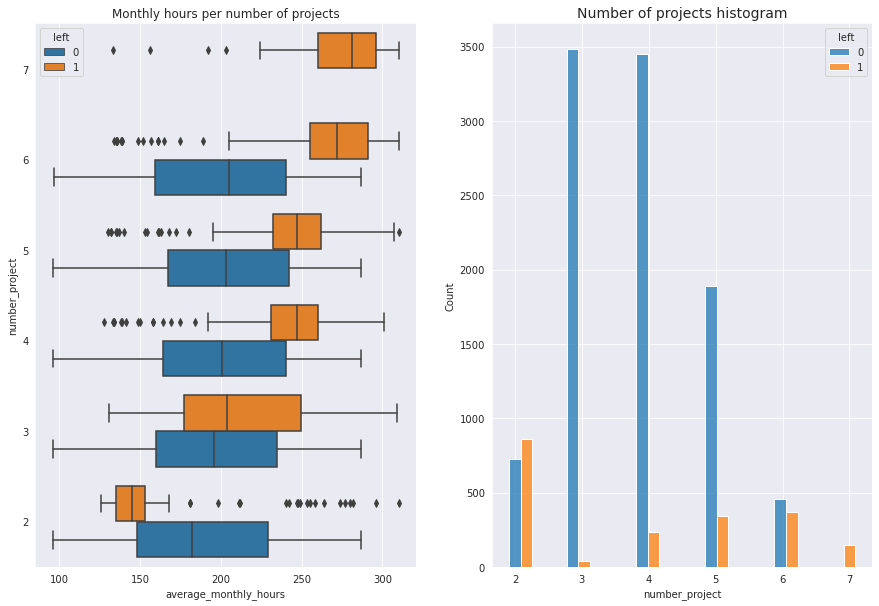

In [130]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1,2, figsize = (15,10))
sns.set_style('darkgrid')
#did it x and y flipped, but it was super ugly so I just flipped it.
#right off the bat, there aren't too many
fig = sns.boxplot(data = df, x ='average_monthly_hours', y='number_project', hue = 'left',orient = 'h',ax = ax[0])
#it's upside down, so I inverted it so its years to top.
ax[0].invert_yaxis()
ax[0].set_title("Monthly hours per number of projects")
sns.histplot(data=df, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

#it seems that there are two types of employees, those who work for way more then other people and 

The first thing that stands out to me is that people who are staying generally have around slightly less then 200 hours a week, more likely something around 180. Everyone in orange has a significantly larger average_monthly hours for work aside from the first group. This says to me that the majority of workers who are leaving are overworked more then the average employee aside from those who are removed for performance reasons. People shouldn't be working nearly 300 hours a month. This tells me that the vast majority of employees are leaving are because they are overworked, and nearly everything else isn't even close. Work distribution needs to more evenly hit around 160 weeks of work, which should account for vacation. 

In order to delve into this, we should look more into if the problem is who is being hired or if work is just not being allocated correctly.

There are two main types of employees, those who didn't work on many projects and those who worked way harder then everyone and left because of it. It seems like on average, we want people to do between 3-5 projects, with 6 pushing it. It's entirely possible that there were people on the 2 side who weren't assigned enough work and left or were already on the way out and were given a reduced workload before they left. 

While I wouldn't probably be able to say this to the people in charge directly, this seems to tell me that there might be something wrong with leadership in some way shape or form, luckily with outliers removed, we can pretty easily find patterns in what makes each group do what.

Another thing that's frightening is how each project from 4 up clearly has a problem with hours and work, looking at how many people are overworking and left from 4 to up. This says to me that not all projects are balanced equally in terms of work.

In [98]:
#I'd like to do a quick eval on the numerical variables directly to see what's what
grouped = df.groupby('left').mean().reset_index()
grouped

left  satisfaction_level  last_evaluation  number_project  \
0     0            0.667365         0.715667        3.786800   
1     1            0.440271         0.721783        3.883476   

   average_monthly_hours    tenure  work_accident  promotion_last_5years  
0              198.94270  3.262000       0.174500               0.019500  
1              208.16223  3.881467       0.052737               0.004018

While this isn't law and a very loose EDA, we can do this quickly and easily to see some slight trends that seem to track with our visualizations. Obviously, those who leave generally speaking have a lower satisfaction level. But what is the most surprising is the thins that seem to cause people to leave. People who are leaving generally have a much longer tenure, and aren't getting a promotion. Even more, in general, these employees who last longer generally don't have work accidents. The way I see it, there may potentially be a trend in people who know they are better workers being passed up for younger people who are getting promotions even though they are causing more issues. When people who are tenured the longest in general are leaving, this points to a potenital problem with new leadership, and needing to start from the bottom and going up the chain.

Just by looking at this, we can see that satisfaction level will also have a good correlation in some way shape or another, and should be looked into as well. Work_accident can be held on and looked into as well.

In [102]:
df_left = df[df['left'] == 1]
df_stayed = df[df['left'] == 0]

In [106]:
#quick inspection
df_left['number_project'].value_counts()

2    857
6    371
5    343
4    237
7    145
3     38
Name: number_project, dtype: int64

In [107]:
df_stayed['number_project'].value_counts()

3    3482
4    3448
5    1890
2     725
6     455
Name: number_project, dtype: int64

This is just a quick thing to find the numbers for in terms of amount, and we can see that there really aren't that many people in the 3 and 4 groups having issues compared to the majority of people who are employed, which says to me that these people who are on these projects are having issues that are localized to their own project overworking them. This says to me that these people are much easier to have a fix for, by either redistributing their project in some sort of way with the rest of the people in their groups or their specific group has an issue. Most importantly, it shows that the number of projects is correlated to the amount of hours being worked, which seems to be the more accurate variable in determining where there is some sort of issue regarding leaving and staying. Number of projects directly correlates to hours worked, and hours worked is where we need to investigate more.

# Looking into Hours Worked

We earlier looked at number of projects and saw that number of hours is easily more important regarding the satisfaction of employees, which means we should investigate this deeper. 

The universal standard is to work 40 hours a week. 40 * 52/12 is about 173.3 hours, where we will lower to 170 for the purpose of this project in order to account for PTO. While we could go lower, it's clear that from the average number of hours worked, 170 would actually be on the lower side of people who are working regardless, with the mean hours worked nearing 200. 

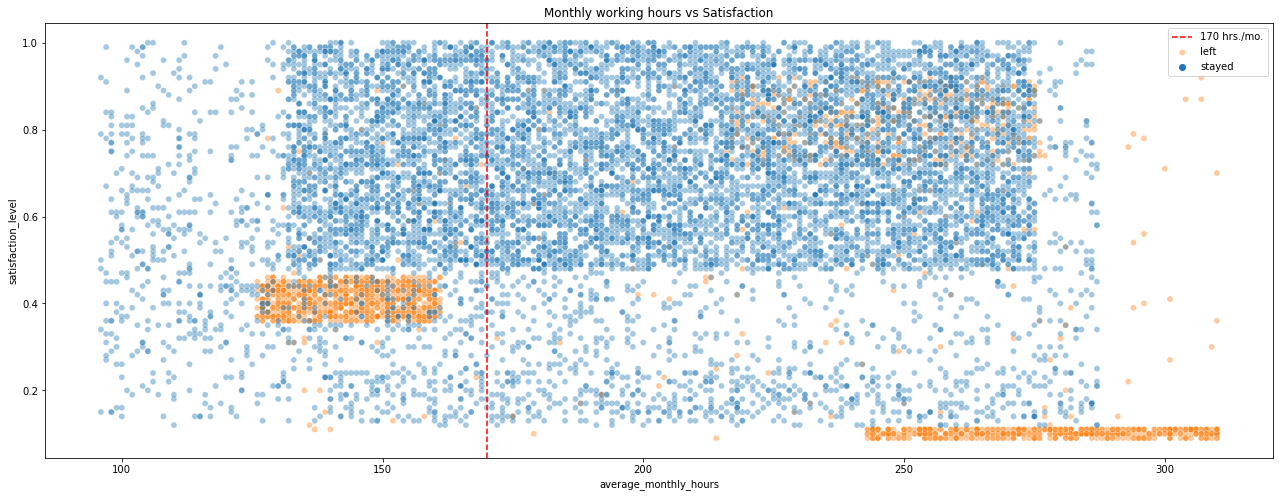

In [111]:
# 'satisfaction_level' accourding to 'average_monthly_hours'
plt.figure(figsize=(22,8))
sns.scatterplot(x=df['average_monthly_hours'], y=df['satisfaction_level'], hue=df['left'], alpha=0.4)
plt.axvline(x=170, color='red', label='170 hrs./mo.', ls='--')
plt.legend(labels=['170 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly working hours vs Satisfaction')
plt.show()

There is a massive group of people who worked over 240 hours, which clearly were unhappy with the amount of hours they worked. Another thing that is intersting is the second group of people who were working well under the hours and were simply just not happy comparatively. While we can clearly see that the overworking in terms of hours, especially with some nearling 270 completely being orange, we know that there are still people who weren't happy. 

While we can't tell what exactly lead to everyone writing 0.4 and working similar hours, part of me thinks that the problem was they either were being pressured to work more and weren't happy about it or were potentially tracked in 'anonymous' surveys, meaning they didn't want to be put too far down. There is also the potential that they were simply not given enough work even though there was plenty to go around, and is their source of frusturation.

# Tenure 

With number of projects and work thoroughly investigated, the other two variables that showed some sort of promise was how long they were at the company and generally being unhappier the longer they were there. 

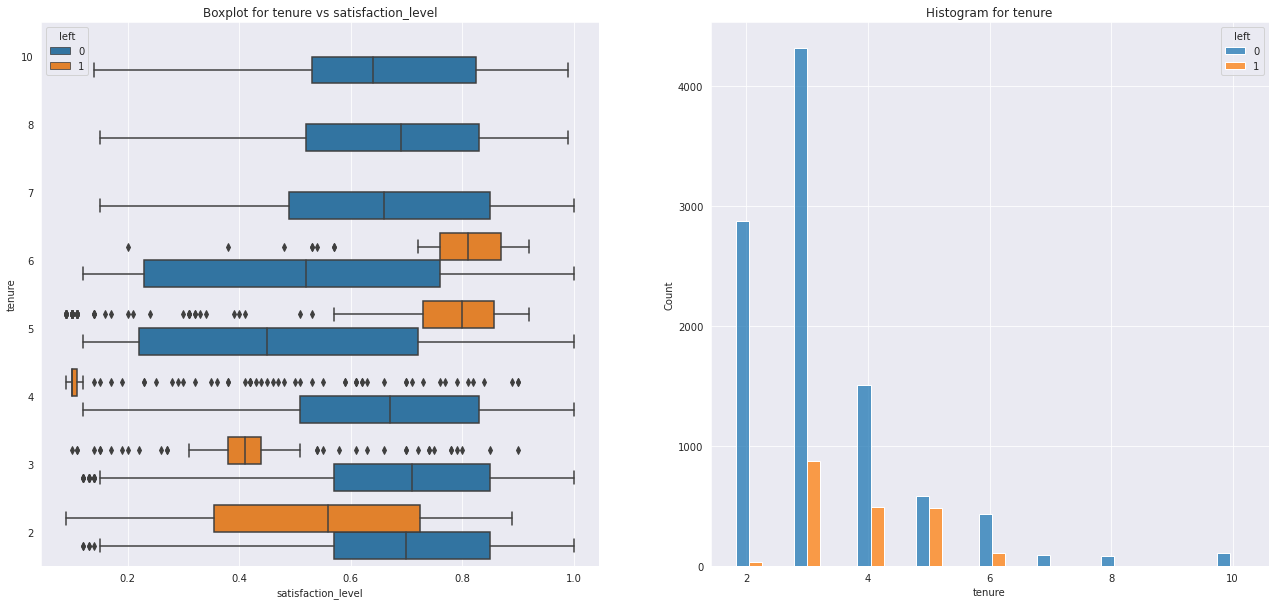

In [131]:
# Create a plot as needed
### YOUR CODE HERE ###
# Satisfaction level for tenure
fig, ax = plt.subplots(1, 2, figsize = (22,10))
#want to change the 0 and 1 to left and stayed for the label but can't figure out how.
sns.boxplot(x=df['satisfaction_level'], y=df['tenure'], hue=df['left'], orient='h', ax=ax[0])
ax[0].set_title('Boxplot for tenure vs satisfaction_level')
ax[0].invert_yaxis()
# Histogram showing distribution of tenure and compairing employees who left and stayed
sns.histplot(data=df, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Histogram for tenure')

plt.show()

There are two main categories like before, dissatisfied with shorter tenures, which were most likely just not a good long term fit. The other half is people who were there for a long time and actually seemed to be very satisfied medium length tenures, who most likely left to search other pastures.

The most alarming thing is the 4th year, being the only year that seems to generally have a real satisfaction level drop.

In [132]:
grouped

left  satisfaction_level  last_evaluation  number_project  \
0     0            0.667365         0.715667        3.786800   
1     1            0.440271         0.721783        3.883476   

   average_monthly_hours    tenure  work_accident  promotion_last_5years  
0              198.94270  3.262000       0.174500               0.019500  
1              208.16223  3.881467       0.052737               0.004018

In [141]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
tenure                     int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

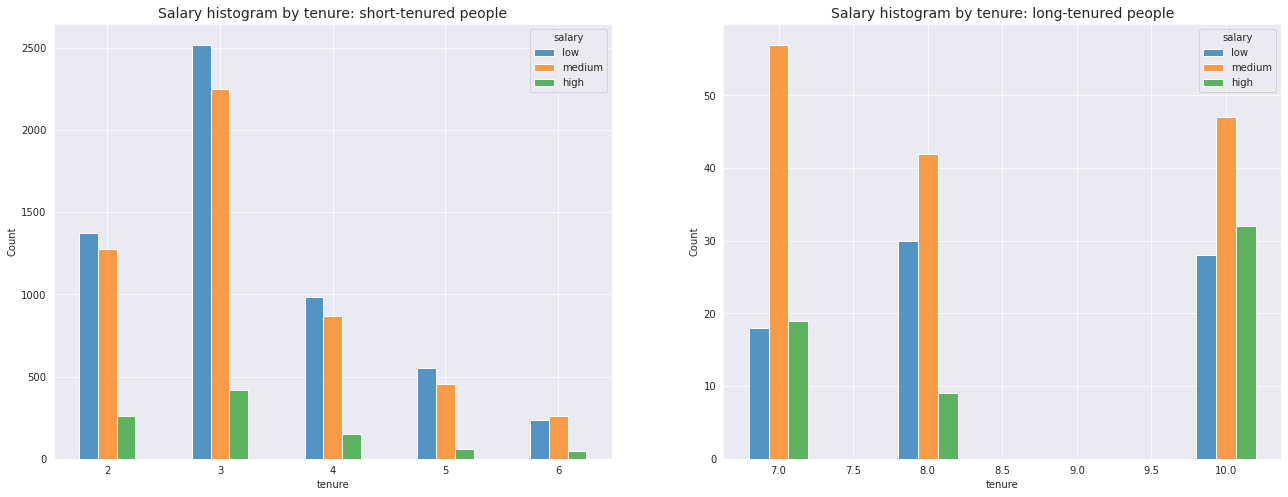

In [140]:
fig, ax = plt.subplots(1, 2, figsize=(22,8))
short_tenure = df[df['tenure'] < 7]
long_tenure = df[df['tenure'] > 6]

sns.histplot(data=short_tenure, x='tenure', hue='salary', multiple='dodge',
             hue_order=['low', 'medium', 'high'], shrink=.5, discrete=1, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize=14)

sns.histplot(data=long_tenure, x='tenure', hue='salary', multiple='dodge',
             hue_order=['low', 'medium', 'high'], shrink=.4, discrete=1, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize=14)

plt.show()

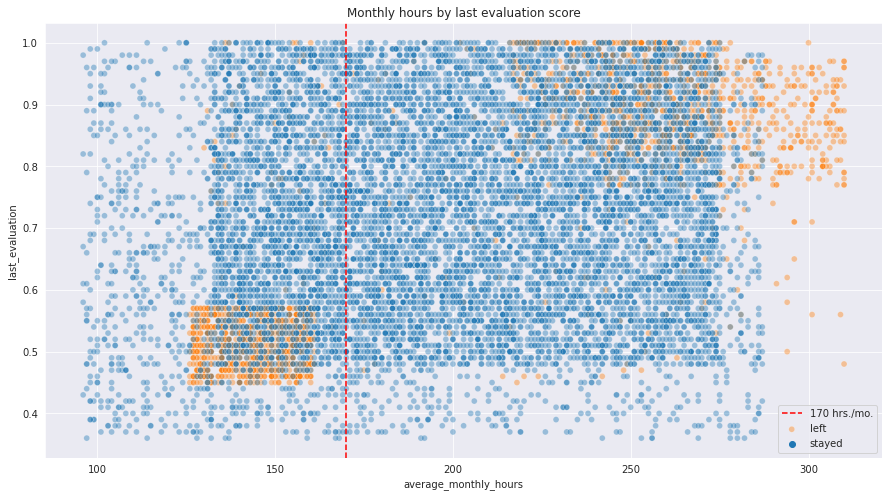

In [147]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=170, color='red', label='170 hrs./mo.', ls='--')
plt.legend(labels=['170 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='12');

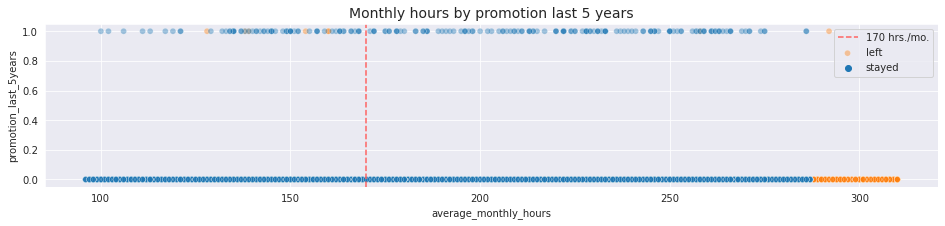

In [145]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=170, color='red', ls='--')
plt.legend(labels=['170 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

Very few employees were even promoted in the last five years
Very few employees who actually worked the most were promoted the most
All of the employees who left were working the most


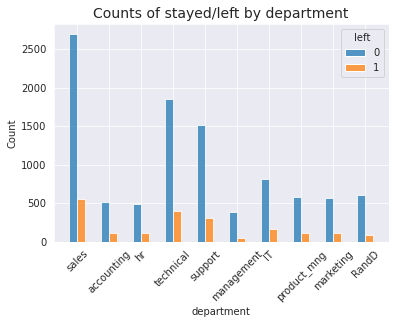

In [151]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't

sns.histplot(data=df, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);


There really isn't a strong correlation between people who decided to stay and leave based on their department. That can be thrown out.

We'll finally look at a heatmap for correlations. 

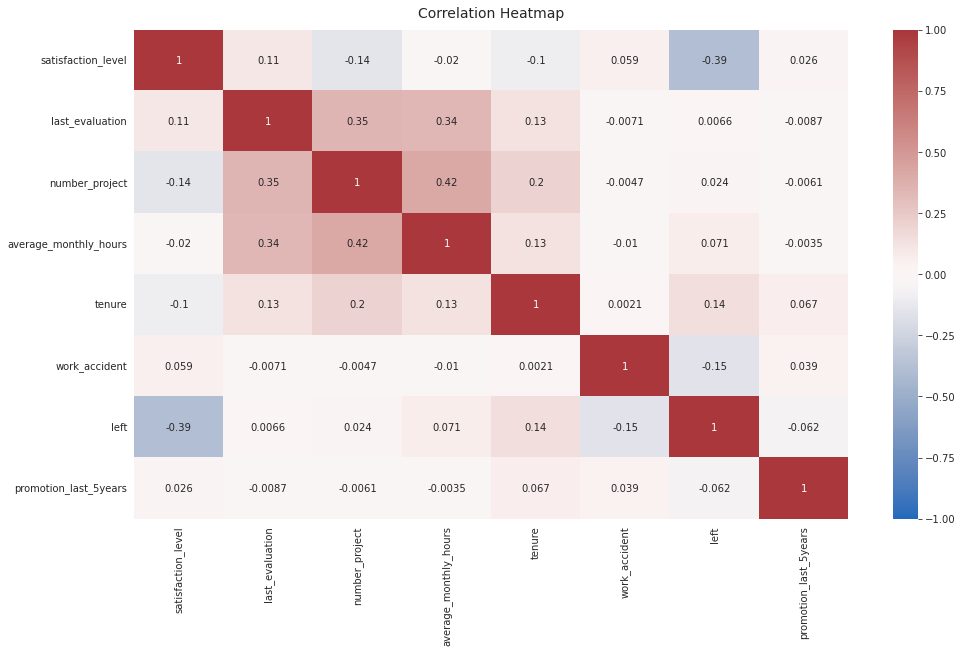

In [152]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

This just confrimes what we already know, there is a problem with number of projects, monthly hours, and evaluation scores.

### Insights

There is no other way to say it, but there is a severe problem with management. Employees are being overworked, promotions are being dolled out at near random, work isn't allocated evenly and some workers are working far more then others. Evaluations most likely aren't accurate, as those people who are doing the evaluations are promoting the people who aren't working the most. I would assume that in year 4 some massive management shakeup happened, which is where there was a huge shift in terms of favorability in the company and everything seemed to go downhill.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


üîé
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





üí≠
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

Since we are dealing with mainly numerical data in a large dataset that can be broken down into numbers along with some clear patterns that are being shown with certain values, I believe it is best to use logistic regression. It's ideal to see how our code actually performs compared to any black box based approach that would result in not fully knowing how we came to our conclusion, especially with our EDA showing that there is a general good place to start.

### Modeling

Add as many cells as you need to conduct the modeling process.

We need to convert our categorical values into dummies. Department, and salary.

Salary has some sort of order to it, so we shouldn't just set it to 0 and 1 if it has it, but 0 1 and 2 based on if its low med or high.

In [156]:
# Copy the dataframe
### YOUR CODE HERE ###
df_enc = df.copy()


# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0              0   
1       6              0     1                      0       1              0   
2       4              0     1                      0       1              0   
3       5              0     1                      0       0              0   
4       3              0     1                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

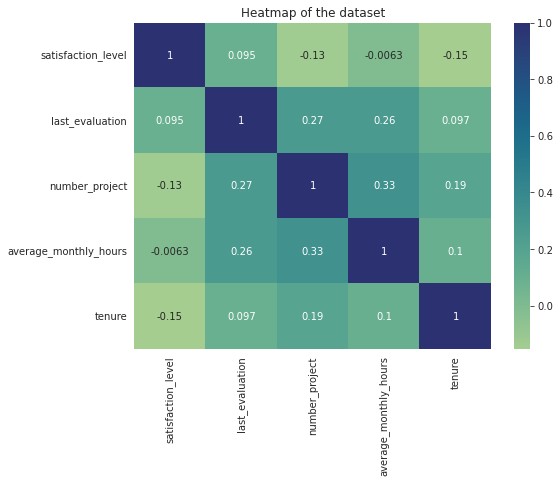

In [157]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

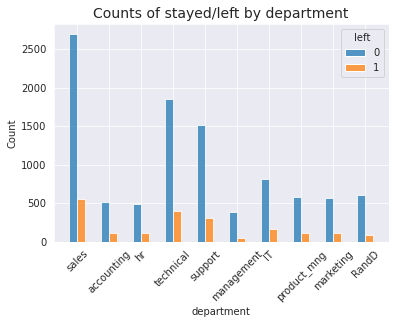

In [160]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't

sns.histplot(data=df, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);


In [161]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0              0   
2       4              0     1                      0       1              0   
3       5              0     1                      0       0              0   
4       3              0     1                      0       0              0   
5       3              0     1                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0  
5                 1                   0                     0

In [162]:
# Isolate the outcome variable
y = df_logreg['left']

# Display first few rows of the outcome variable
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [169]:
df_logreg.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_monthly_hours       int64
tenure                      int64
work_accident               int64
left                        int64
promotion_last_5years       int64
salary                       int8
department_IT               uint8
department_RandD            uint8
department_accounting       uint8
department_hr               uint8
department_management       uint8
department_marketing        uint8
department_product_mng      uint8
department_sales            uint8
department_support          uint8
department_technical        uint8
dtype: object

In [163]:
# Select the features you want to use in your model
X = df_logreg.drop('left', axis=1)

# Display the first few rows of the selected features 
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0              0   
2       4              0                      0       1              0   
3       5              0                      0       0              0   
4       3              0                      0       0              0   
5       3              0                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0  
5                 1                   0                     0

In [170]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [172]:
# Added max_iter because this laptop is old 
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [173]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

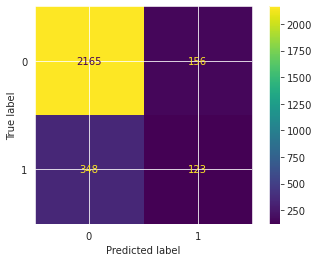

In [175]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [176]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



Th e logistic regression model doesn't have the best time in predicting who will leave, but is very good at predicting who will stay.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



‚úè
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






üí≠
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results
0.79      0.82      0.80
The logistic regression model achieved a precision of 79%, recall of 82%, f-1 score of 80% and accuracy of 83% on the test set.

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.

Cap the number of projects that one person can work on
Promote employees who have been with the company for at least 4 years or figure out what's wrong with their dissatisfaction
Don't let employees work this many hours. If you do, make sure they are rewarded in some way for working so many hours

Spread the work out more evenly and make sure that it is spread out evenly among workers. 
Evaluation scores should determine how many hours somebody worked. 
Hire more employees in order to lighten the work load on everyone.
Investigate what policies were enacted four years ago that caused so many issues.